# Wine 데이터 분석하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### K-Means 모델 생성/학습

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=2021) # kmeans 선택
kmeans.fit(df) # 훈련

KMeans(max_iter=100, n_clusters=3, random_state=2021)

In [4]:
# 훈련결과
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [5]:
df['target'] = wine.target      # 실제 target class
df['cluster'] = kmeans.labels_  # Clustering 결과 도출된 class
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


In [6]:
# 실제 결과와 비교해보기
clustering_result = df.groupby(['target', 'cluster']).count()
clustering_result

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             46          46   46                 46         46   
       1             13          13   13                 13         13   
1      0              1           1    1                  1          1   
       1             20          20   20                 20         20   
       2             50          50   50                 50         50   
2      1             29          29   29                 29         29   
       2             19          19   19                 19         19   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   46          46                    46   
       1                   13          13                    13   
1      0                    1           1                     1   
       1                   20          20                    20   
       2                   50          50                    50   
2      1                   29          29                    29   
       2                   19          19                    19   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     46               46   46   
       1                     13               13   13   
1      0                      1                1    1   
       1                     20               20   20   
       2                     50               50   50   
2      1                     29               29   29   
       2                     19               19   19   

                od280/od315_of_diluted_wines  proline  
target cluster                                         
0      0                                  46       46  
       1                                  13       13  
1      0                                   1        1  
       1                                  20       20  
       2                                  50       50  
2      1                                  29       29  
       2                                  19       19

- 시각화

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [8]:
df['pca_x'] = wine_pca[:, 0]
df['pca_y'] = wine_pca[:, 1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831


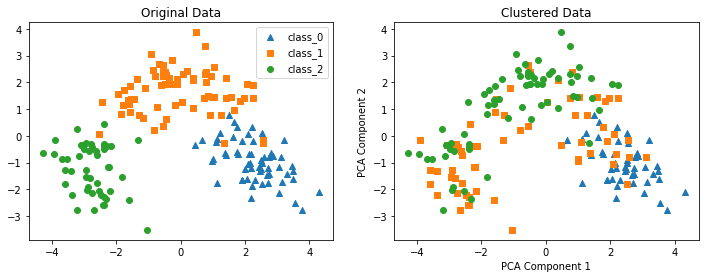

In [9]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']
markers=['^', 's', 'o']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column]==i]['pca_x']
        y_axis_data = df[df[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data,
        marker=marker, label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 위에서 군집화 된 결과가 이상하므로, 학습 전 한 번 더 scaler를 해보기

In [10]:
# pipeline = 인터넷 참고(https://bcho.tistory.com/1203)

df2 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df2.head()

from sklearn.pipeline import make_pipeline

scaler2 = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=2021) # kmeans 선택
pipeline = make_pipeline(scaler2, kmeans)
pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans',
                 KMeans(max_iter=100, n_clusters=3, random_state=2021))])

In [11]:
# 훈련결과
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
df2['target'] = wine.target      # 실제 target class
df2['cluster'] = kmeans.labels_  # Clustering 결과 도출된 class
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831


In [13]:
# 실제 결과와 비교해보기 / 아까보다 훨씬 깔끔해짐
clustering_result = df.groupby(['target', 'cluster']).count()
clustering_result

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             46          46   46                 46         46   
       1             13          13   13                 13         13   
1      0              1           1    1                  1          1   
       1             20          20   20                 20         20   
       2             50          50   50                 50         50   
2      1             29          29   29                 29         29   
       2             19          19   19                 19         19   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   46          46                    46   
       1                   13          13                    13   
1      0                    1           1                     1   
       1                   20          20                    20   
       2                   50          50                    50   
2      1                   29          29                    29   
       2                   19          19                    19   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     46               46   46   
       1                     13               13   13   
1      0                      1                1    1   
       1                     20               20   20   
       2                     50               50   50   
2      1                     29               29   29   
       2                     19               19   19   

                od280/od315_of_diluted_wines  proline  pca_x  pca_y  
target cluster                                                       
0      0                                  46       46     46     46  
       1                                  13       13     13     13  
1      0                                   1        1      1      1  
       1                                  20       20     20     20  
       2                                  50       50     50     50  
2      1                                  29       29     29     29  
       2                                  19       19     19     19

- 재시각화

In [14]:
scaler3 = StandardScaler()
wine_std2 = scaler3.fit_transform(wine.data)

pca2 = PCA(n_components=2)
wine_pca2 = pca2.fit_transform(wine_std2)

In [15]:
df2['pca_x'] = wine_pca2[:, 0]
df2['pca_y'] = wine_pca2[:, 1]
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,1.008908,-0.869831


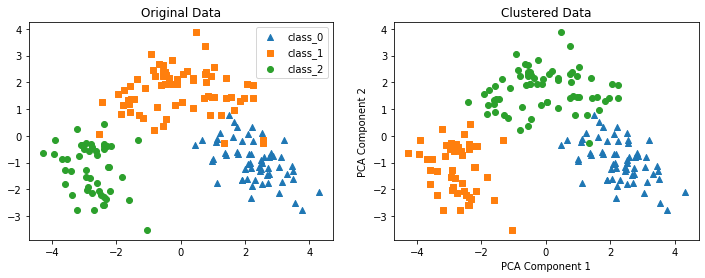

In [16]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']
markers=['^', 's', 'o']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df2[df2[column]==i]['pca_x']
        y_axis_data = df2[df2[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 새로 나온 데이터를 토대로, Clustering 알고리즘 테스트를 위한 데이터 생성

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=3, random_state=2021)
print(X.shape, y.shape)

(200, 2) (200,)


In [18]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [19]:
clusterDF = pd.DataFrame(X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-2.870830,-0.543596,1
1,9.691286,-14.448113,2
2,9.583819,-11.116303,2
3,6.980622,-9.033997,2
4,-6.296733,2.696087,1


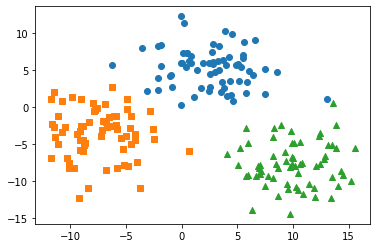

In [20]:
markers=['o', 's', '^', 'P','D','H','x']

target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF.target == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
                marker=markers[target])
plt.show()

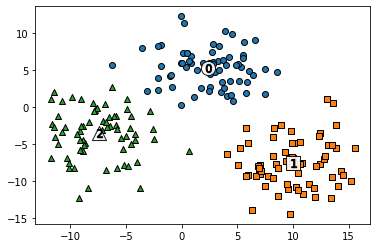

In [21]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

### 실루엣 분석

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_samples = silhouette_samples(wine.data, df2.cluster)
df2['실루엣 계수'] = score_samples
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.586918
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.573073
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.651565
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.546194
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,1.008908,-0.869831,-0.643257


In [23]:
silhouette_score(wine.data, df2.cluster)

0.21704016132108517

In [24]:
df2['실루엣 계수'].mean()

0.21704016132108514

In [25]:
df2.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.389409
1    0.205125
2    0.071001
Name: 실루엣 계수, dtype: float64

### 실루엣 스코어

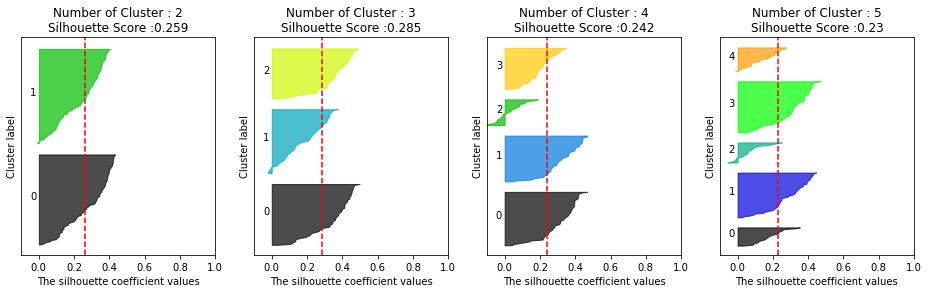

In [37]:
import visualize

visualize_silhouette([2,3,4,5], wine_std2)